## Abstractive Summarisation

Here we generate new sentences from the original text. This is in contrast to the extractive approach, where we used only the sentences that were present. The sentences generated through abstractive summarisation might not be present in the original text:
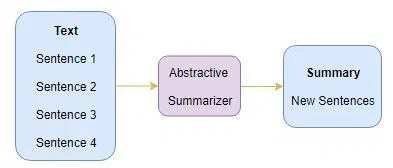

Here we are building an Abstractive Text Summariser using Deep Learning.

### Introduction to Sequence-to-Sequence (Seq2Seq) Modelling

We can build a Seq2Seq model on any problems that involves sequential information. This includes Sentiment classification, Neural Machine Translation and Named Entity Recognition.

Here our objective is to build a text summarizer where the input is a long sequence of words (in a text body), and the output is a short summary (which is a sequence as well). So we can model this as a **Many-to-Many Seq2Seq problem**.
<img src="../figures/encoder-decoder.jpg">
There are two major components of a Seq2Seq model:
* Encoder
* Decoder

### Understanding the Encoder-Decoder Architecture
>The Encoder-Decoder architecture is mainly used to solve the sequence-to-sequence (Seq2Seq) problems where the input and output sequences are of different lengths.

From the perspective of text summarization, the input is a long sequence of words and the output will be a short version of the input sequence.
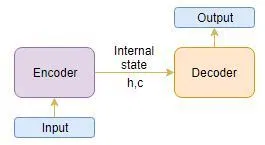

Generally, variants of RNNs (GRUs or LSTMs) are preferred as the encoder and decoder components. This is because they are capable of capturing long term dependencies by overcoming the problem of vanishing gradient.

We can set up the Encoder-Decoder in 2 phases:

* Training phase
* Inference phase

### Training phase
In the training phase, we will first set up the encoder and decoder. We will then train the model to predict the target sequence offset by one timestep. Let's see in detail how to set up the encoder and decoder.

#### Encoder
An encoder Long-Short Term Memory model (LSTM) reads the entire input sequence wherein, at each timestep, one word is fed into the encoder. It then processes the information at every timestep and captures the contextual information present in the input sequence.

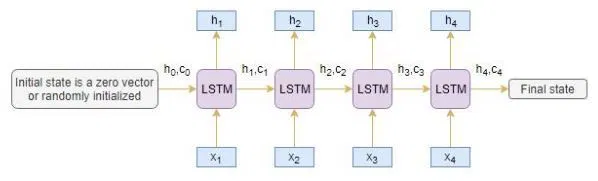

The hidden state (h$_i$) and cell state (c$_i$) of the last time step are used to initialize the decoder. Remember, this is because the encoder and decoder are two different sets of the LSTM architecture.

#### Decoder
The decoder is also an LSTM network which reads the entire target sequence word-by-word and predicts the same sequence offset by one timestep. **The decoder is trained to predict the next word in the sequence given the previous word.**


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('../data/with_cleaned.csv')

/Users/sueliu/Mudano/customer-complaints/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
!pip install nltk

In [44]:
first_complaint = df['Consumer complaint narrative'].values[8]

In [17]:
from nltk.tokenize import sent_tokenize

In [45]:
sentences = sent_tokenize(first_complaint)

In [41]:
df[['Issue', 'Product']].iloc[8]

Issue      False statements or representation
Product                       Debt collection
Name: 8, dtype: object

In [46]:
sentences

['I received a negative report on my credit report.',
 'It was from Enhanced Recovery comapany.',
 'They represent XXXX.',
 'It states that it is a new account and has an open date XX/XX/2016.',
 'That is false and hurts my credit score.',
 'I have been with XXXX for the past 10 years.',
 'I would like for this to be removed from my credit report.',
 'I filed a dispute with XXXX but it came back as correct which it is not and is illegal.',
 'Can you please remove this information from my credit report.']